# Empalme con la clase anterior
## AdaGrad

El método construye

$$\eta^{(i)} = \frac{\eta}{\sqrt{G^{(i)} + \epsilon}} $$
donde

$$G^{(i)} = \sum_{j=1}^i g^{(j)} \circ g^{(j)} $$
el $\epsilon >0$ es un número pequeño que ayuda a estabilizar la division (evitar división por cero).

$$\theta^{(i)} = \theta^{(i-1)} - \eta^{(i)} \circ g^{(i)} $$

## AdaDelta
El AdaGrad tiene el problema de que los $G^{(i)}$ pudieran volverse muy  grandes. Una forma de controloar mas el $\eta$ es hacerlo sobre una ventana rodante (rolling window).

El algoritmo es básicamente el mismo pero

$$G^{(i)} = \sum_{\max \{j-w, 1 \} }^{\min \{ j + w, i \}}  g^{(j)} \circ g^{(j)}  $$

Este metodo fue inventado por Matthew D. Zeiler en 2012 (referencia en las notas de clase).

Tiene las siguientes ventajas sobre el AdaGrad:
* Es mas flexible (por $w$ es variable, puede ser hasta el 20 por ciento de las epocas.
* ES mas estable, en el sentido de que el gradiente no se va hacia cero para epocas lejanas. $i \gg 1$.

## RMSprop:
Este metodo no esta publicado si no que Geoffrey Hinton (Universidad de Toronto). Lo hizo en un curso de Coursera (en un slide).


El RMSprop es una hibrido entre el momento y el AdaGrad.
para un $\eta >0 \text{ y  }  \ll 1$ escalar

\begin{eqnarray}
v^{(i)} = \beta v^{(i-1)} + (1 - \beta) g^{(i)} \circ g^{(i)} \\
\theta^{(i)} = \theta^{(i-1)} - \frac{\eta}{\sqrt{v^{(i)} + \epsilon}} \circ g^{(i)}
\end{eqnarray}
Normalmente asumimos  $v^{(0}=0$.
Tambien se puede pensar en un hibrido con Nesterov. En Nesterov el gradiente se evalua "ahead" es decir en $\theta^{(i+1)}$ en vez de $\theta^{(i)}$.


## Adam (Adaptive Momenta).
En este algoritmo, creado por Kingma and Ba en 2017 (referencias en las notas de clase).
Diederik P. Kingma and Jimmy Ba. Adam: A method for stochastic optimization.
[arxiv](https://arxiv.org/abs/1412.6980), 2017.

La idea es extender el algoritmo anterior con dos momentos. Primero y segundo momento.

\begin{eqnarray}
s^{(i)} &=& \beta_1 s^{(i-1)} + (1 - \beta_1) g^{(i)} \\
t^{(i)} &=& \beta_2 t^{(i-1)} + (1 - \beta_2) g^{(i)} \circ g^{(i)} \\
\theta^{(i)} &=& \theta^{(i-1)} - \frac{\eta s^{(i)}}{\sqrt{t^{(i)} + \epsilon}}
\end{eqnarray}

Los autores recomiendan $\beta_1=0.9$, $\beta_2 = 0.999$. Si la primera iteración comienza con 0 .

$$s^{(0)} = 0 =  t^{(0)} $$
entonces
\begin{eqnarray}
s^{(1)} &=& 0.1 g^{(1)} \tag{1} \\
t^{(1)} &=& 0.001 \; g^{(1)} \circ g^{(1)} \tag{2} \\
\theta^{(1)} &=& \theta^{(0)} - \frac{\eta s^{(1)}}{t^{(1)} + \epsilon}
\end{eqnarray}

Fijense por emplo que $s^{(i)}$ tiende a perder tamaǹo y más aún, $t^{(i)}$. Este es un problema en este algortimo. Por eso los autores proponen una **normalizacion**.  De la siguiente

\begin{eqnarray}
s^{(i)} &=& \beta_1 s^{(i-1)} + (1 - \beta_1) g^{(i)} \\
t^{(i)} &=& \beta_2 t^{(i-1)} + (1 - \beta_2) g^{(i)} \circ g^{(i)} \\
s^{(i)} &\leftarrow&  \frac{s^{(i)}}{1 - \beta_1^2} \\
t^{(i)} &\leftarrow&  \frac{t^{(i)}}{1 - \beta_2^2}
\end{eqnarray}
Ellos llaman a esta normalizacion **bias correction**.

Con esta corrección las ecuaciones (1) y (2) quedan

\begin{eqnarray}
s^{(1)} &=& \frac{0.1 g^{(1)}}{0.19} \approx 0.526 g^{(1)}  \\
t^{(1)} &=& \frac{0.001 g^{(1)} \circ g^{(1)} }{0.00199} \approx 0.5 g^{(1)} \circ g^{(1)}.
\end{eqnarray}


En resumen. Estudiamos los siguientes aceleradores de gradiente:

* Momento (Poliak)
* Nesterov (Nesterov)
* Adagrad ( John Duchi, Elad Hazan, and Yoram Singer.)
* AdaDelta (Matthew Zeiler)
* RMSprop ( Geoffrey Hinton)
* Adam (Kingma y Ba)

## Demos:
Los demos nos sirven para evaluar los aceleradores.
Voy a agregar una buena cantidad de "links" a esta clase por lo útiles.

En Wikipedia existe un "link" de
[funciones de optimización](https://en.wikipedia.org/wiki/Test_functions_for_optimization)
Estas  funciones no son solo para probar algoritmos de descenso sino tambien aceleradores de gradiente como veremos en unos minutos.

Por ejemplo, la función
[Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function). Esta funcion es la que usón en la tarea de la pagina Why Momentum Really Works.


Otra función intersante es la Beale function.

$$f(x,y) = (1.5 - x + xy)² + (2.25 - x + x y²)² + (2.625 - x + x y³)²  $$
La gráfica de esta función se muestra en la Figura 3.36.


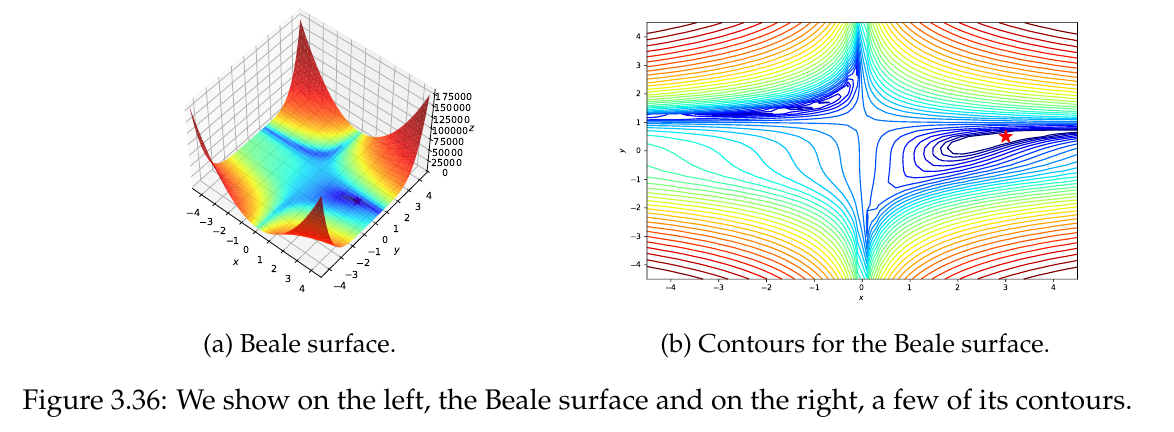

Otro link importante es el de
[optimizers in numpy](https://github.com/ilguyi/optimizers.numpy).
Este sitio analiza la funcion (superficie) Beale con los aceleradores que aprendimos en estas ultimas dos clases.

Finalmente
[Lili Jiang](https://github.com/lilipads/gradient_descent_viz)
comparte en GitHug un demo tipo GUI (Graphical User Interface) con una superficie y varios minimos y "bolitas" que decienden a traves de la superficie, los colores de la bolitas representan el metodo. Permite dibujar flechas para orienticion, gradiente, etc. La figura se puede rotar para verla desde distintos angulos. Los parametros:
*  $\eta$
*  $\beta$
*  $\beta_1, \beta_2$,
etc.

El link
[Virtual Library of Simulation Experiments](https://www.sfu.ca/~ssurjano/optimization.html) ofrece 47 funciones reto para problemas de optimización.

Para terminar esta sección describimos dos funciones reto tomadas de los "links" de arriba.

#### Ackley function
$$f(x) = -a \exp \left (  -b \sqrt{ \frac1n \sum_{i=1}^n x_i²} \right )
-\exp \left ( \frac1n \sum_{i=1}^n \cos (c x_i)  \right )  + a + \exp(1)$$
donde $n$ es el numero de dimensiones, para $n=2$ se y $a=20$, $b=0.2$ $c=2$.

$$f(x,y) = -20 \exp \left (  -0.2 \sqrt{ 0.2 (x² + y²)} \right )
-\exp \left ( 0.5 \sum_{i=1}^n \cos (2 x_i)  \right )  + 20 + \exp(1) \tag{3} $$

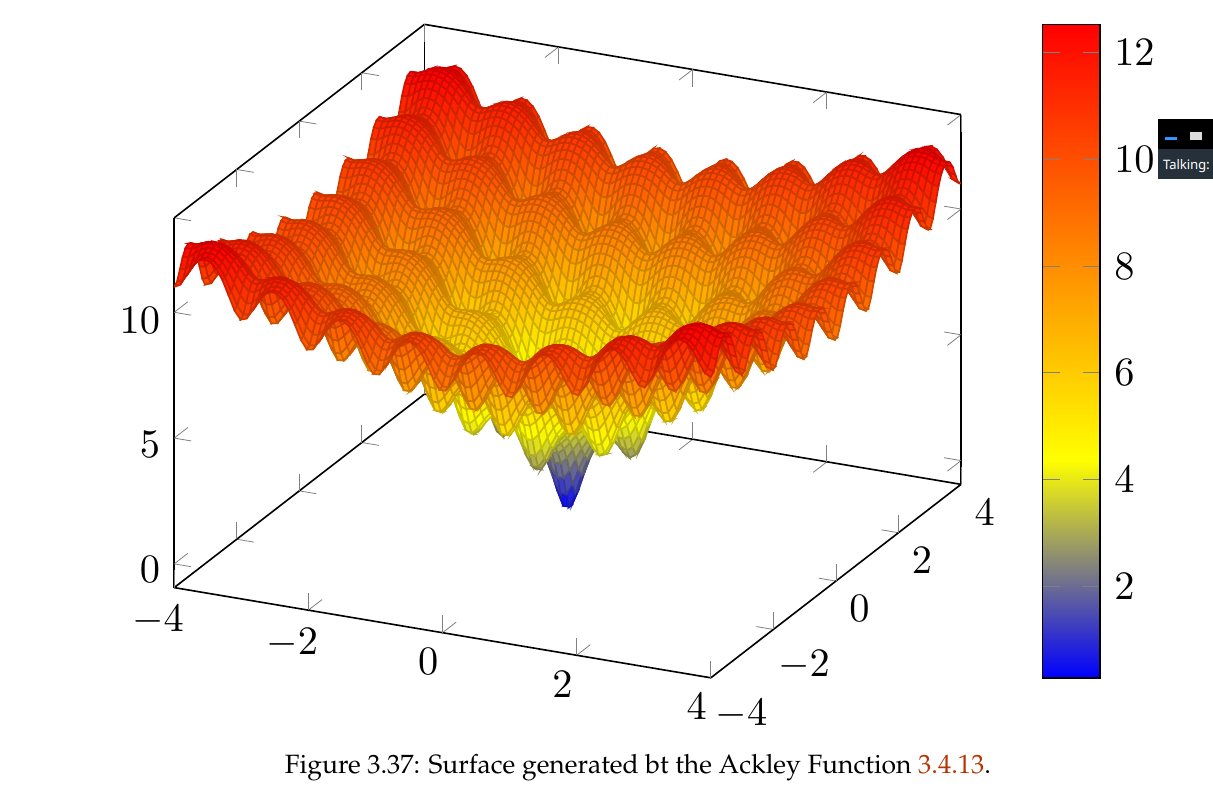

### Rastrigin Function

$$f(x) = A n + \sum_{i=1}^n [ x_i² - A \cos (2 \pi x_i) ]  $$
donde $x=(x_1, x_2, \cdots, x_n)$.
Si escojemos $n=2$, $A=10$

$$f(x,y) = 20 + x² - 10 \cos(2 \pi x)  + y² - 10 \cos (2 \pi y) \tag{4} $$

i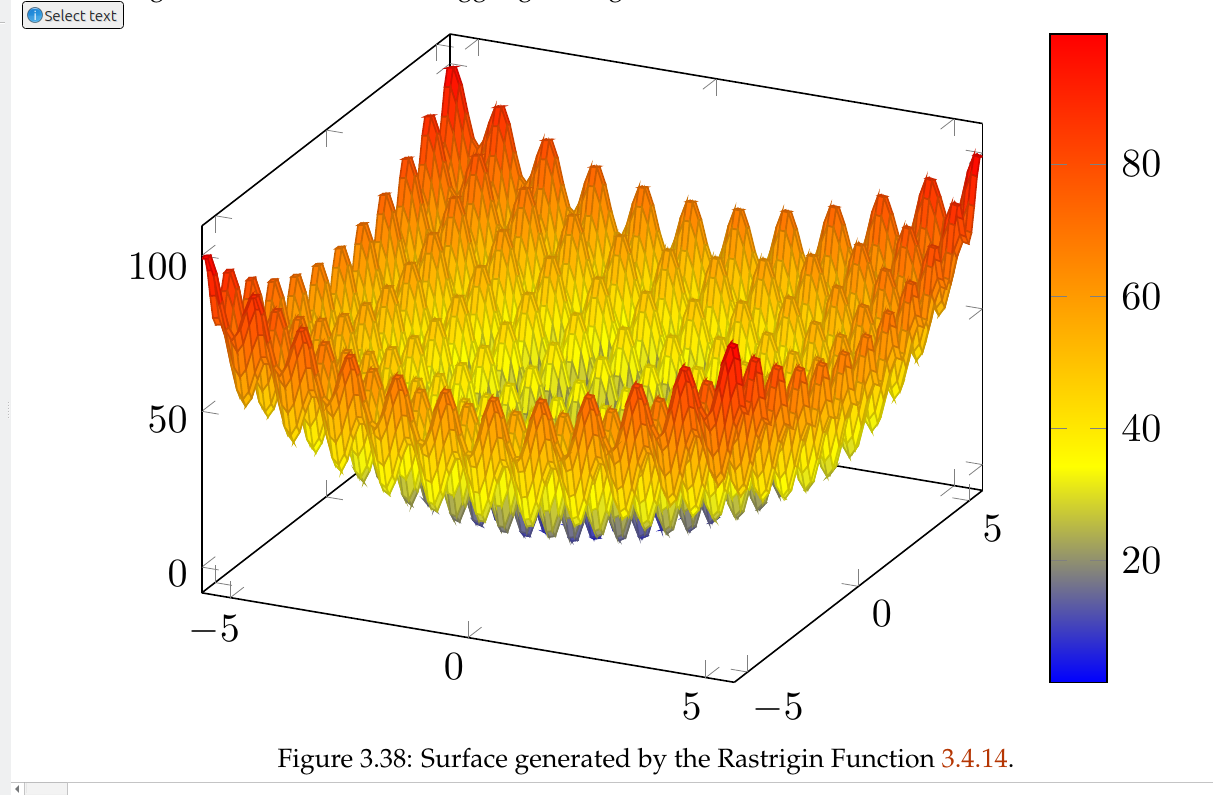

Las Figuras 3.37 y 3.38 muestran la Ackley function y la Rastrigin Function respectivamente definidas arriba (Ecuaciones (3) y (4).)

A las 8:00 pm.

* Funciones de costo para Ml (DL).


* ANN: Artificial Neural Networks. (gradiente).

## Funciones de costo.
En ML la funcion de costo es una medida del error entre las etiquetas (metodos supervisados) y el resultado del modelo. Son utiles para dos cosas:

1. Estimar el error.
2. Con la funcion de costo obtenemos el **gradiente**.

Mencionamos en esta clase tres funciones de costo.

1. Mean Square Error (MSE): se hace en el continuo. Por ejemplo regresion lineal.
2. Cross-entropy loss: Binaria.
3. Categorical Cross-entropy loss. (multiclase $>2$).

### MSE: Mean Squared Error:
$$C(\theta) = \frac1m \sum_{i=1}^m ( h(\theta, x_i) - y_i)^2 + \frac{\lambda}{2 n } \sum_{i=1}^n \theta_i^2 $$
Donde

* $\theta$ es el **parametro**.  $\theta \in \mathbb{R}^n$
* $x_i$ es la muestra $i$. $x_i \in \mathbb{R}^n$
* La hipotesis $h(\theta, x_i) = x_i^{T} \theta$.
* $y_i \in \mathbb{R}^m$ son las etiquetas.
* $i=1,2, \cdots , m$.

### Cross-entropy:
Se usa la logistic sigmoid  function

$$h(z) = S(z) = \frac{1}{1 + \exp(-z)} $$
nosotros identificamos $z = x^T \theta$.

La usamos en el caso binario. En el curso de ML encontramos en la parte de regresión logistica

$$C(\theta) = -\frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)}]  + \frac{\lambda}{2n} \sum_{j=1}^n \theta_j \tag{5}  $$

Si tenemos mas de dos clases usamos

### Categorical Cross-Entropy loss (perdida de entropia  cruzada categorica).
Podemos pensar en la generalización de la Ecuación 5
Asumimos $K > 2$ clases.

 $$C(\theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^k \log [ h_k(\theta, x^{(i)})] + (1 - y_i^k) \log [ 1 - h_k(\theta, x^{(i)}]  + \frac{\lambda}{2n} \sum_{j=1}^n \theta_j^2. $$

Pensamos en el problema como sigue: Si por ejemplo hay tres clases: perro, gato, cerdo, usamos **one-hot-encoding** vectors.

$$gato = \begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix} \quad , \quad perro =  \begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix} \quad , \quad cerdo = \begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix} $$

Podemos generalizar el problema de otra forma. Definimos una generalizacion de la funcion sigmoid para $K>2$ clases.

\begin{eqnarray}
\sigma : \mathbb{R}^K &\to [ 0, 1]^K \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)}
\quad , \quad i=1,2, \cdots, K \quad , z_i \in \mathbb{R}
\end{eqnarray}
La función $\sigma(z)$ se comporta como una densidad de probabilidad.

Con esta función de activación podemos escribir la hipótesis $h(\theta, x)$ como sigue

$$
h(\theta, x) = \begin{pmatrix}
P(y=1 | x ; \theta)  \\
P(y=2 | x ; \theta)  \\
\vdots \\
P(y=K | x ; \theta)  \\
\end{pmatrix}
= \begin{pmatrix}
\sigma(z_1)  \\ \sigma(z_2) \\ \vdots \\ \sigma(z_k)
\end{pmatrix}
= \frac{1}{\sum_{j=1}^K \exp( (\theta^{(j)})^T x)}
\begin{pmatrix}
\exp( \theta^{(1)})^T x  \\
\exp( \theta^{(2)})^T x  \\
\vdots \\
\exp( \theta^{(K)})^T x  \\
\end{pmatrix}
$$


Aca $z_i = (\theta^{(i)})^T x$, $x=1,2, \cdots, K$

Esta es la generalización de la funcion logística para $K$ dimensiones y $h(\theta,x)$ la correspondiente hipótesis.

Debemos obtener la función de costo.
De la misma forma que obtuvimos la función de costo para regresión logística, también la vamos a obtener para el "categorical cross entropy loss function ¨.

* Escriban la funcion de probabilidad multidimensional para cada muestra $x_i$.
* Halle la función de "likelihood" (verosimilitud) que debe ser maximada como un doble producto sobre clases y sobre muestras.
* Como hallar el maximo de un producto no es conveniente (derivar un producto es mucho mas dificil que una suma) entonces tomamos el logaritmo, de este doble producto y obtenemos una doble suma.

* Cambiamos el signo de "+" a "-" .
Obenemos la categorical cross-entropy.

$$C(\theta) = - \left [ \sum_{i=1}^m \sum_{k=1}^K \mathbb{1} \{ y^{(i)} = k \}  \log \frac{\exp( (\theta^{(k)})^T x^{(i)}}{\sum_{j=1}^K \exp ( (\theta^{(j)})^T x^{(j))} ) } \right ]   $$

Donde

$$\mathbb{1} =
\begin{cases}
1  \quad , \quad \text{si  } x  \quad \text{es verdad}  \\
0  \quad , \quad \text{si  } x  \quad \text{no es verdad}
\end{cases} $$

Por u$$ ltimo necesitamos el gradiente de la funcion de costo.
Ejercicio:

$$\nabla C(\theta^{(k)} = -\sum_{i=1}^m \left [
x^{(i)} \left (  \mathbb{1} \{ y^{(i)} = k \}  - P( y^{(i)} = k | x^{(i)}; \theta^{(k)} )   \right )   \right ] $$

donde

$$P( y^{(i)} = k | x^{(i)}; \theta^{(k)})  = \log \frac{\exp(z_k)}{\sum_{j=1}^K \exp(z_{jk})} $$
con
$$z_{ik} = {\theta^{(k)}}^T x^{(i)}  $$
$k=1,2, \cdots, K$, $i=1,2, \cdots, m$

## Notas sobre entropía.
De la teoría de información tenemos el concepto de **cross-entropy**:

$$H(p,q) = -\sum_x p(x) \log q(x) $$
donde $p,q$ son funciones de probabilidad, discretas sobre $x$. (si fueran continuas la suma seria una integral) Funciones de masa para discretas y de densidasd para continuas.

Esta función obtiene su **mínimo** cuando $p=q$. Una forma de ver esto es usando la definción de **Kullback-Leibler (KL)**

$$D_{KL}(p \parallel q) = \sum_x p(x) \log \frac{p(x)}{q(x)} $$

Encontrar el mínimo de $H(p,q)$ con $p$ fijo es equivalente a minimizaro $D_{KL}(p \parallel q)$  dado que

$$H(p,q) = H(p) + D_{KL} ( p \parallel q)  $$

y dado que $D_{KL}(p \parallel q) \ge 0$.

En general categorical cross-entropy (CCE) se puede definir como

$$L = - \sum_{i=1}^K y_i \log ( \hat{y_i}) $$

donde $y_i$ es la etiqueta y $\hat{y_i}$ es el estimado. Por ejemplo 1 para la clase correcta y 0 para clase incorrecta.


# Proxima clase:  Redes neuronales: Back propagation.
